# [Inspired by this solution to compare the probability of a Friday lands on 13th day of a month. ](http://www.stats.uwo.ca/faculty/aim/epubs/Friday13/friday13.htm)

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

**The Term Ergodic .** The term ergodic is used in statistical physics, Markov chain theory and in time series analysis. In time series analysis, we say a covariance stationary time series is ergodic in the mean if the sample mean converges as the length of the time series increases to the mean over the distribution the ensemble or sample space of all possible time series. In Markov chain theory, a chain is said to be erodic if a limiting distribution exists for the states. In statistical physics, the ergodic hypothesis states for a gas in equilibrium, all states have an equal probability of realization. Our use of the term borrows from the usage in statistical physics. In simpler language, nonergodic really just means not equally probable. 

**Nonergodic property of Friday 13th .** A surprising property of our calendar is that not all days of the week have equal chance of being the 13th of the month if you consider the long-run. For example, if you randomly select the 13th day of any month from all years between say 2,000 AD and 1,000,000,000,000 AD then the probability that it is Friday is exactly 43/300 which is slightly larger than 1/7. Moreover, in the long-run, the 13-th of the month has a higher probability of falling on a Friday than any other weekday. 

**Our Calendar Cycles .** In the long-run, not every day of the week is equally probable of occurring on a given calendar date like the 13th of the month. The reason for this is due to the leap year effect which causes our calendar system to exactly cycle every 400 years and to the particular lengths chosen for our months. To show that the calendar cycles every 400 years, we compute the number of days in 400 years and note that it is divisible by 7. 

In [2]:
a = 365 * 400 + 100 - 3
print('Calenday cycles over 400 years: %d' %(a) )
k = a % 7
print('Dvided by 7? %s'%(k == 0))

Calenday cycles over 400 years: 146097
Dvided by 7? True


In [3]:
WeekDays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
from datetime import date
import calendar
from datetime import datetime

In [4]:
# example
# Monday is 0 and Sunday is 6.
calendar.day_name[datetime.strptime('1-Jan-2000','%d-%b-%Y').weekday()]

'Saturday'

In [5]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
day13 = np.zeros((7,1)); year13 = np.zeros((400,7));total = 0
for ii in range(400):
    for jj in range(len(months)):
        year = 2000 + ii -1 
        date_str = '%s-13-%d' %(months[jj],year)
        jday = datetime.strptime(date_str,'%b-%d-%Y').weekday()
        day13[jday] = day13[jday] + 1
        year13[ii,jday] = year13[ii,jday] + 1
        total += 1
        
print(WeekDays,'\n',day13.T)

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
 [[ 685.  685.  687.  684.  688.  684.  687.]]


So we see there are a total of 688 Friday the 13ths and the next highest is 687 for Wednesday. The total number 13ths is 400*12 or 4800. So the exact probability of Friday the 13th is 688/4800=43/300. We compute the probabilities and plot them: 

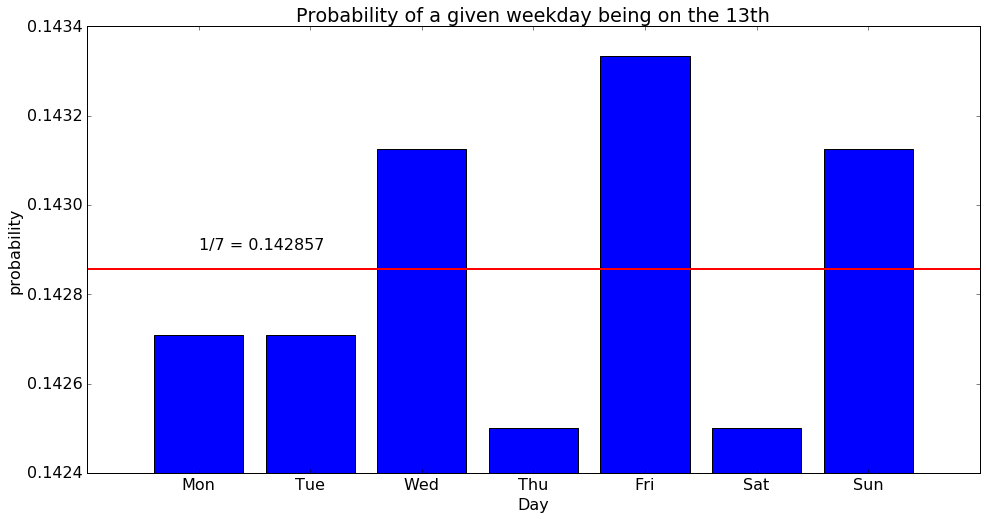

In [6]:
prob13 = day13 / 4800
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(np.arange(len(prob13)),prob13,align='center')
ax.set(ylim=(0.1424,0.1434),xticks = np.arange(len(prob13)),
       xticklabels=WeekDays,
       xlabel='Day',ylabel='probability',
       title='Probability of a given weekday being on the 13th',
       )
ax.axhline(y=1/7,color='red',linewidth=2)
ax.annotate('1/7 = %.6f'%float(1/7),xy=(0,0.1429),fontsize=16)

Next we investigate the distribution of weekdays which fall on the 13th on the month. At first glance it would seem that every year could have 13 possibilities for the number of Sunday the 13ths, ..., Friday the 13ths, etc. viz. (0, 1, ... , 12). So we count the number of times each weekday occurs on the 13th of the month in the array 

In [7]:
dis13 = np.zeros((7,13))
for ii in range(400):
    for jj in range(7):
        nij = year13[ii,jj]
        dis13[jj,nij] = dis13[jj,nij] + nij
print(dis13)

[[   0.  172.  342.  171.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  171.  346.  168.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  172.  338.  177.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  172.  344.  168.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  171.  340.  177.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  172.  344.  168.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]
 [   0.  170.  346.  171.    0.    0.    0.    0.    0.    0.    0.    0.
     0.]]


c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


So for any specific weekday the number of times it can be the 13th in a given year varies from 2 to 4 and for Friday we see that there are respectively 171, 340 and 177 times it occurs 1, 2 or 3 times in a year. Similarly, Saturday occurs 1, 2 or 3 times, 172, 344, 168 times every 400 years. 

**Next 28 Year Cycle .** Over the next 28 year cycle, the 13-th is equi-probable for each weekday. From the next calculation, each weekday occurs 48 times as the 13-th of the month over this shorter cycle. 

In [8]:
np.sum(year13[:28,:],0)

array([ 48.,  48.,  48.,  48.,  48.,  48.,  48.])

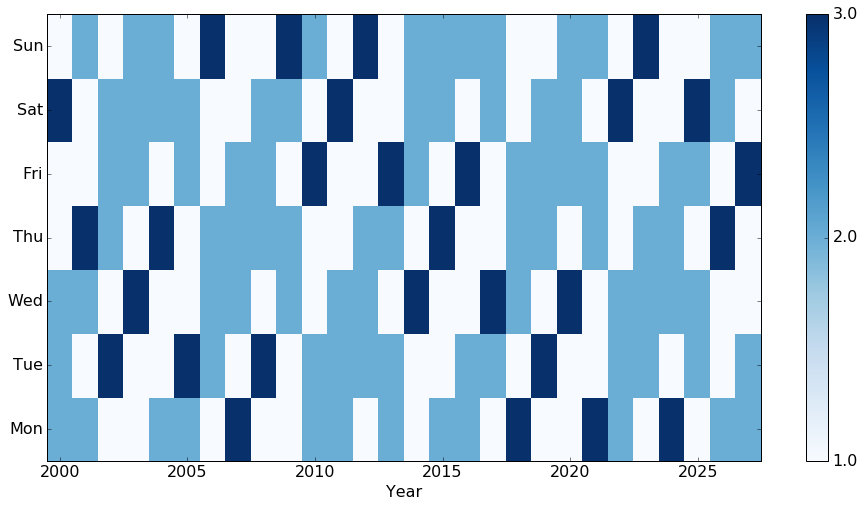

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig,ax1 = plt.subplots(figsize=(16,8))
x = np.arange(year13[:28,:].shape[0]) 
y = np.arange(year13[:28,:].shape[1]) 
T = ax1.pcolormesh(year13[:28,:].T,cmap = plt.cm.Blues)
cbar = plt.colorbar(T)
cbar.set_ticks([1.,2.,3.])
cbar.set_ticklabels([1.,2.,3.])
_=ax1.set(xticks=(x+0.5)[::5],xticklabels=np.arange(2000,2028)[::5],
        yticks=y+0.5,yticklabels=WeekDays,
         ylim=(0,7),xlim=(0,year13[:28,:].shape[0]),
         xlabel='Year',ylabel='')

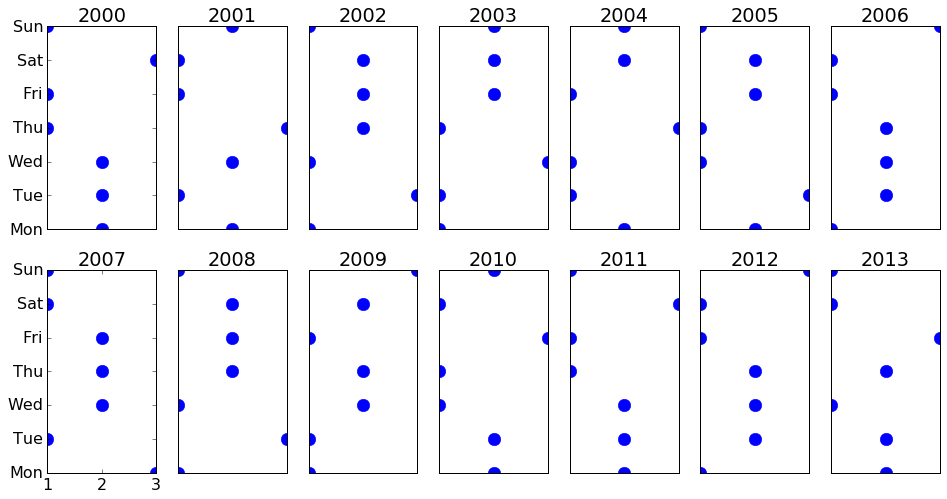

In [11]:
fig,axes = plt.subplots(2,7,figsize=(16,8))
years = np.arange(2000,2014)
for ii, ax in enumerate(axes.flatten()):
    _=ax.plot(year13[ii,:],np.arange(len(WeekDays)),'.',markersize=25)
    _=ax.set(xticks=[],yticks=[],title=years[ii])
_=axes[0,0].set(yticks=np.arange(len(WeekDays)),
            yticklabels=WeekDays)
_=axes[1,0].set(yticks=np.arange(len(WeekDays)),
            yticklabels=WeekDays,xticks=[1,2,3])

**Conclusion .** The statement that Friday the 13th is more probable than any other weekday is only true over the long-run when we consider at least 400 years or more.